## **CIS9650 Group Project - Group5  (Hojin Lee, Julie Leung, Nafis Chowdhury, Kelly Osadiaye)**


**Dataset we chose for the project**
- https://www.kaggle.com/airbnb/seattle?select=reviews.csv
- Using only listings.csv, including full descriptions and average review score


**Data analysis plan**
- Importing the Airbnb data to clean
- Dropping insiginificant columns
- Dealing with missing values and outliers on categorical and numerical variables
- Performing statistical analysis including mean, max, min, and correlation
- Using both categorical and numerical variables for data visualization
- Exporting the clean data to a database using Sqlite3

**Goal**
- Correlation between variables using heatmap
- Comparison between price and reviews
- Comparison between price and bed type
- Comparison between number of listings and neighborhood 

# **Step1) Importing the data to clean**
- Kaggle API 

In [ ]:
pip install kaggle

In [ ]:
mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!echo '{"username":"jinlee1290","key":"2579a01cbcd865245e50f227e2f035ad"}' > ~/.kaggle/kaggle.json

In [ ]:
from kaggle.api.kaggle_api_extended import KaggleApi

In [ ]:
api = KaggleApi()
api.authenticate()

In [ ]:
api.dataset_download_file('airbnb/seattle', 'listings.csv')

False

In [ ]:
import pandas as pd
df = pd.read_csv('listings.csv.zip')

In [ ]:
#view first five rows of data
df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,...,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,NaN,NaN,

# **Step2) Cleaning the data**


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pandas import Series, DataFrame

In [ ]:
#view first 3 rows of data
df.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,transit,thumbnail_url,medium_url,picture_url,xl_picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,city,state,...,bedrooms,beds,bed_type,amenities,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,NaN,NaN,NaN,NaN,https://a1.muscache.com/ac/pictures/67560560/c...,NaN,956883,https://www.airbnb.com/users/show/956883,Maija,2011-08-11,"Seattle, Washington, United States","I am an artist, interior designer, and run a s...",within a few hours,96%,100%,f,https://a0.muscache.com/ac/users/956883/profil...,https://a0.muscache.com/ac/users/956883/profil...,Queen Anne,3.0,3.0,"['email', 'phone', 'reviews', 'kba']",t,t,"Gilman Dr W, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,1.0,1.0,Real Bed,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",NaN,$85.00,NaN,NaN,NaN,NaN,2,$5.00,1,365,4 weeks ago,t,14,41,71,346,2016-01-04,207,2011-11-01,2016-01-02,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",What's up with the free pillows? Our home was...,"Convenient bus stops are just down the block, ...",https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/im/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,https://a0.muscache.com/ac/pictures/14409893/f...,5177328,https://www.airbnb.com/users/show/5177328,Andrea,2013-02-21,"Seattle, Washington, United States",Living east coast/left coast/overseas. Time i...,within an hour,98%,100%,t,https://a0.muscache.com/ac/users/5177328/profi...,https://a0.muscache.com/ac/users/5177328/profi...,Queen Anne,6.0,6.0,"['email', 'phone', 'facebook', 'linkedin', 're...",t,t,"7th Avenue West, Seattle, WA 98119, United States",Queen Anne,West Queen Anne,Queen Anne,Seattle,WA,...,1.0,1.0,Real Bed,"{TV,Internet,""Wireless Internet"",Kitchen,""Free...",NaN,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,1,$0.00,2,90,today,t,13,13,16,291,2016-01-04,43,2013-08-19,2015-12-29,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,Our house is located just 5 short blocks to To...,A bus stop is just 2 blocks away. Easy bus a...,NaN,NaN,

In [ ]:
# listings dataset has 3818 records and 92 columns before cleaning
df.shape

(3818, 92)

### **Drop insignificant columns**

In [ ]:
columns_to_drop = ["listing_url","description","scrape_id","last_scraped",
"summary","space","experiences_offered","neighborhood_overview","notes", "transit",
"thumbnail_url", "medium_url", "picture_url", "xl_picture_url", 
"name","host_id","host_url","host_name", "host_about", "host_thumbnail_url","host_picture_url",
"host_listings_count","host_verifications","street","neighbourhood_cleansed",
"neighbourhood_group_cleansed","state","market", "smart_location","country_code", "country",
"latitude","longitude","amenities","calendar_updated","has_availability","availability_90",
"availability_365","calendar_last_scraped","first_review","last_review",
"requires_license","license","jurisdiction_names"]


In [ ]:
df.drop(columns = columns_to_drop, inplace = True)

In [ ]:
# Now, the dataset has 3818 records and 48 columns after dropping insigniciant columns
# The number of records(3818) doesn't change yet
df.shape

(3818, 48)

###  **Dealing with missing values (Numerical variables)**

In [ ]:
# number of missing values on each column 
df.isnull().sum().sort_values(ascending=False)

square_feet                         3721
monthly_price                       2301
security_deposit                    1952
weekly_price                        1809
cleaning_fee                        1030
host_acceptance_rate                 773
review_scores_accuracy               658
review_scores_checkin                658
review_scores_value                  656
review_scores_location               655
review_scores_cleanliness            653
review_scores_communication          651
review_scores_rating                 647
reviews_per_month                    627
host_response_rate                   523
host_response_time                   523
neighbourhood                        416
host_neighbourhood                   300
bathrooms                             16
host_location                          8
zipcode                                7
bedrooms                               6
host_identity_verified                 2
host_has_profile_pic                   2
host_total_listi

In [ ]:
# total missing values are 18602 
df.isnull().sum().sum()

18602

In [ ]:
# all columns to replace with median
all_columns_to_replace = ['host_response_rate', 'host_acceptance_rate',
       'host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 
       'beds', 'square_feet', 'price', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 
       'calculated_host_listings_count','reviews_per_month']

# these should be int or float but data type is object due to the mark "$" or "%""
columns_to_change_dtypes = ['host_response_rate', 'host_acceptance_rate',
                            'price','weekly_price', 'monthly_price','security_deposit', 
                            'cleaning_fee', 'extra_people']

columns_to_keep_dtypes = [
       'host_total_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 
       'beds', 'square_feet', 'guests_included',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 
       'calculated_host_listings_count','reviews_per_month']


In [ ]:
# first, we replace all values of int/float dtypes with median (columns_to_keep_dtypes)
for i in df.columns:
  if i in columns_to_keep_dtypes:
    df[i].fillna(df[i].median(), inplace=True)

df.isnull().sum().sum()

9651

In [ ]:
# second, we are going to deal with object values (columns_to_drop_dtypes)
df[columns_to_change_dtypes].head()

,host_response_rate,host_acceptance_rate,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people
0,96%,100%,$85.00,NaN,NaN,NaN,NaN,$5.00
1,98%,100%,$150.00,"$1,000.00","$3,000.00",$100.00,$40.00,$0.00
2,67%,100%,$975.00,NaN,NaN,"$1,000.00",$300.00,$25.00
3,NaN,NaN,$100.00,$650.00,"$2,300.00",NaN,NaN,$0.00
4,100%,NaN,$450.00,NaN,NaN,$700.00,$125.00,$15.00


In [ ]:
# 'host_response_rate': endswith %
# 'host_acceptance_rate': endswith %
# 'price','weekly_price': startswith $
# 'monthly_price': startswith $
# 'security_deposit': startswith $
# 'cleaning_fee': startswith $
# 'extra_people': startswith $

# for %
def trim_col(col):
  df[col] = df[col].replace('%',"",regex=True).astype(np.float64)

trim_col('host_response_rate')
trim_col('host_acceptance_rate')

# for $
def trim_col2(col2):
  df[col2] = df[col2].str.replace('$', '')
  df[col2] = df[col2].str.replace(',', '')
  df[col2] = df[col2].astype('float')

trim_col2('price')
trim_col2('weekly_price')
trim_col2('monthly_price')
trim_col2('security_deposit')
trim_col2('cleaning_fee')
trim_col2('extra_people')


In [ ]:
df[columns_to_change_dtypes].head()

,host_response_rate,host_acceptance_rate,price,weekly_price,monthly_price,security_deposit,cleaning_fee,extra_people
0,96.0,100.0,85.0,NaN,NaN,NaN,NaN,5.0
1,98.0,100.0,150.0,1000.0,3000.0,100.0,40.0,0.0
2,67.0,100.0,975.0,NaN,NaN,1000.0,300.0,25.0
3,NaN,NaN,100.0,650.0,2300.0,NaN,NaN,0.0
4,100.0,NaN,450.0,NaN,NaN,700.0,125.0,15.0


In [ ]:
df[columns_to_change_dtypes].dtypes

host_response_rate      float64
host_acceptance_rate    float64
price                   float64
weekly_price            float64
monthly_price           float64
security_deposit        float64
cleaning_fee            float64
extra_people            float64
dtype: object

In [ ]:
# now, we replace all numerical values with median
for i in df.columns:
  if i in all_columns_to_replace:
    df[i].fillna(df[i].median(), inplace=True)

df[all_columns_to_replace].head()

,host_response_rate,host_acceptance_rate,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
0,96.0,100.0,3.0,4,1.0,1.0,1.0,750.0,85.0,650.0,2200.0,250.0,50.0,2,5.0,1,365,14,41,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,2,4.07
1,98.0,100.0,6.0,4,1.0,1.0,1.0,750.0,150.0,1000.0,3000.0,100.0,40.0,1,0.0,2,90,13,13,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,6,1.48
2,67.0,100.0,2.0,11,4.5,5.0,7.0,750.0,975.0,650.0,2200.0,1000.0,300.0,10,25.0,4,30,1,6,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,2,1.15
3,100.0,100.0,1.0,3,1.0,0.0,2.0,750.0,100.0,650.0,2300.0,250.0,50.0,1,0.0,1,1125,0,0,0,96.0,10.0,10.0,10.0,10.0,10.0,10.0,1,1.54
4,100.0,100.0,2.0,6,2.0,3.0,3.0,750.0,450.0,650.0,2200.0,700.0,125.0,6,15.0,1,1125,30,60,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,1,0.89


In [ ]:
# no more missing values on numerical variables
df[all_columns_to_replace].isnull().sum()

host_response_rate                0
host_acceptance_rate              0
host_total_listings_count         0
accommodates                      0
bathrooms                         0
bedrooms                          0
beds                              0
square_feet                       0
price                             0
weekly_price                      0
monthly_price                     0
security_deposit                  0
cleaning_fee                      0
guests_included                   0
extra_people                      0
minimum_nights                    0
maximum_nights                    0
availability_30                   0
availability_60                   0
number_of_reviews                 0
review_scores_rating              0
review_scores_accuracy            0
review_scores_cleanliness         0
review_scores_checkin             0
review_scores_communication       0
review_scores_location            0
review_scores_value               0
calculated_host_listings_cou

###**Dealing with outliers of numerical variables**

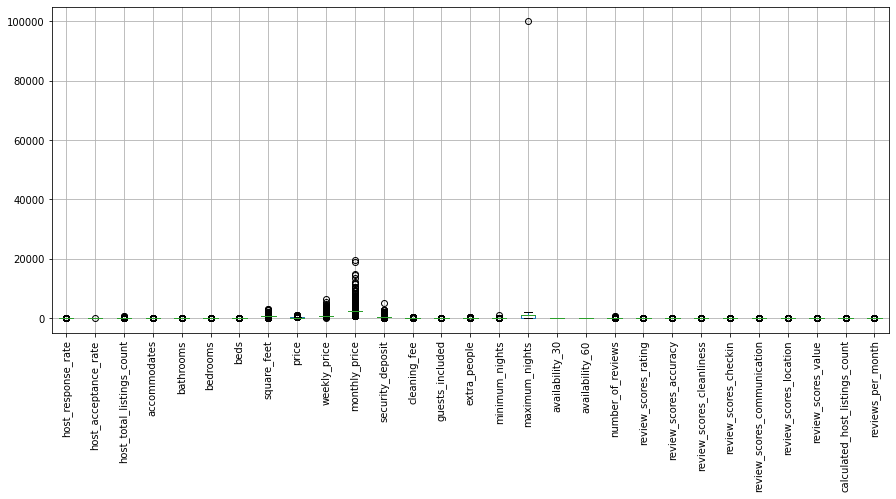

In [ ]:
# we decide to remove outliers because there is a huge difference between outliers and mean so it may affect our results
# with plot, we can see some outliers. 
df[all_columns_to_replace].boxplot(figsize = (15,6))
plt.xticks(rotation=90)
plt.show()

In [ ]:
from scipy import stats

z_scores = stats.zscore(df[all_columns_to_replace])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
new_df = df[filtered_entries]

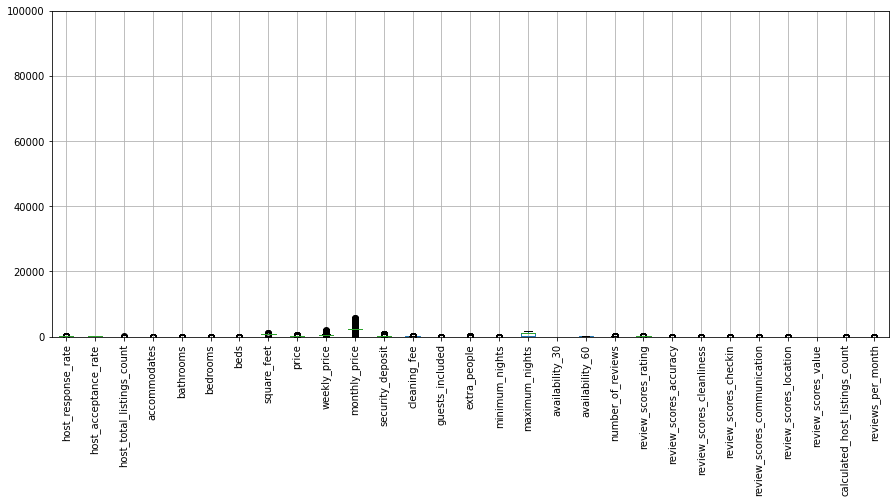

In [ ]:
# now, we see no outliers
new_df[all_columns_to_replace].boxplot(figsize = (15,6))
plt.ylim(0,100000)
plt.xticks(rotation=90)
plt.show()

In [ ]:
# after we removed outliers, the number of recoreds is 2877 (previous records were 3818)
# as a result, we removed 941 records (3818 - 2877 = 941)
new_df.shape

(2877, 48)

### **Dealing with categorical variables**

In [ ]:
new_df.city.unique()

array(['Seattle', 'Ballard, Seattle', 'West Seattle', 'Seattle ', '西雅图',
       'Phinney Ridge Seattle', 'seattle'], dtype=object)

In [ ]:
new_df = new_df[new_df.city != '西雅图'] #filter out this row 

In [ ]:
new_df.loc[new_df.host_is_superhost == 'f', 'host_is_superhost'] = "False" #clean up values

In [ ]:
new_df.loc[new_df.host_is_superhost == 't', 'host_is_superhost'] = "True" #clean up values

In [ ]:
new_df.loc[new_df.instant_bookable == 'f', 'instant_bookable'] = "False" #clean up values

In [ ]:
new_df.loc[new_df.instant_bookable == 't', 'instant_bookable'] = "True" #clean up values

In [ ]:
new_df.loc[new_df.host_has_profile_pic == 'f', 'host_has_profile_pic'] = "False" #clean up values

In [ ]:
new_df.loc[new_df.host_has_profile_pic == 't', 'host_has_profile_pic'] = "True" #clean up values

In [ ]:
new_df.loc[new_df.host_identity_verified == 'f', 'host_identity_verified'] = "False" #clean up values

In [ ]:
new_df.loc[new_df.host_identity_verified == 't', 'host_identity_verified'] = "True" #clean up values

In [ ]:
new_df.loc[new_df.is_location_exact == 'f', 'is_location_exact'] = "False" #clean up values

In [ ]:
new_df.loc[new_df.is_location_exact == 't', 'is_location_exact'] = "True" #clean up values

In [ ]:
new_df.loc[new_df.require_guest_profile_picture == 'f', 'require_guest_profile_picture'] = "False" #clean up values

In [ ]:
new_df.loc[new_df.require_guest_profile_picture == 't', 'require_guest_profile_picture'] = "True" #clean up values

In [ ]:
new_df.loc[new_df.require_guest_phone_verification == 'f', 'require_guest_phone_verification'] = "False" #clean up values

In [ ]:
new_df.loc[new_df.require_guest_phone_verification == 't', 'require_guest_phone_verification'] = "True" #clean up values

In [ ]:
new_df = new_df.dropna() #drop reamining na's

In [ ]:
new_df.head(3)

,id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,city,zipcode,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
1,953595,2013-02-21,"Seattle, Washington, United States",within an hour,98.0,100.0,True,Queen Anne,6.0,True,True,Queen Anne,Seattle,98119,True,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,750.0,150.0,1000.0,3000.0,100.0,40.0,1,0.0,2,90,13,13,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,False,strict,True,True,6,1.48
6,1909058,2012-05-30,"Seattle, Washington, United States",within an hour,100.0,100.0,True,Queen Anne,1.0,True,True,Queen Anne,Seattle,98119,True,House,Private room,2,1.0,1.0,1.0,Real Bed,750.0,80.0,575.0,2200.0,150.0,50.0,1,10.0,3,14,20,49,58,99.0,10.0,10.0,10.0,10.0,10.0,10.0,False,moderate,False,False,1,2.46
9,2493658,2013-02-21,"Seattle, Washington, United States",within an hour,98.0,100.0,True,Queen Anne,6.0,True,True,Queen Anne,Seattle,98119,True,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,750.0,150.0,1000.0,3000.0,100.0,40.0,1,0.0,2,365,6,19,32,97.0,10.0,10.0,10.0,10.0,10.0,9.0,False,strict,True,True,6,1.55


In [ ]:
# after we cleaned both categorical and numerical variables, the number of recoreds is 2186
new_df.shape

(2186, 48)

# **Step3) Statistical Analysis**

In [ ]:
#get summary statistics using describe()
new_df.drop(columns = ['id']).describe()

,host_response_rate,host_acceptance_rate,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
count,2186.000000,2186.0,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000,2186.000000
mean,97.063129,100.0,3.461116,3.042543,1.142040,1.144556,1.553980,749.048490,109.542086,668.073193,2251.978042,243.496798,50.359103,1.573651,9.875572,2.044831,736.326167,17.038884,37.554895,23.037511,95.748856,9.792315,9.734675,9.901189,9.918573,9.705855,9.628545,2.065416,2.145663
std,7.262558,0.0,7.373687,1.446695,0.372478,0.647587,0.810156,21.746099,54.204345,239.375056,670.252704,96.777805,27.843886,0.901725,12.552684,2.136273,509.856941,11.678173,22.258415,27.456301,3.882786,0.440361,0.509009,0.298476,0.273553,0.513375,0.537125,2.310225,1.482212
min,63.000000,100.0,1.000000,1.000000,0.000000,0.000000,1.000000,435.000000,22.000000,161.000000,500.000000,95.000000,5.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,77.000000,8.000000,8.000000,9.000000,9.000000,8.000000,8.000000,1.000000,0.030000
25%,100.000000,100.0,1.000000,2.000000,1.000000,1.000000,1.000000,750.000000,70.000000,575.000000,2200.000000,200.000000,30.000000,1.000000,0.000000,1.000000,60.000000,4.000000,19.000000,3.000000,94.000000,10.000000,10.000000,10.000000,10.000000,9.000000,9.000000,1.000000,1.040000
50%,100.000000,100.0,1.000000,2.000000,1.000000,1.000000,1.000000,750.000000,99.000000,650.000000,2200.000000,250.000000,50.000000,1.000000,0.000000,2.000000,1125.000000,20.000000,46.000000,13.000000,96.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000,1.620000
75%,100.000000,100.0,3.000000,4.000000,1.000000,1.000000,2.000000,750.000000,135.000000,650.000000,2200.000000,250.000000,60.000000,2.000000,20.000000,2.000000,1125.000000,29.000000,58.000000,32.000000,99.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,2.000000,3.000000
max,100.000000,100.0,84.000000,8.000000,3.000000,3.000000,5.000000,1000.000000,395.000000,1899.000000,5600.000000,800.000000,175.000000,5.000000,60.000000,30.000000,1825.000000,30.000000,60.000000,135.000000,100.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,18.000000,7.020000


In [ ]:
# Correlation Matrix

# At this stage, we are conducting the Statistical analysis.
# The best way to find the mutual relationship between two columns is calculating the correlation.
# we dropped 'host_acceptance_rate' because the records are all NaN.
# Few of the correlations are descibed as below:

# a) The correlation between accomodates and square_feet of the listings (0.027) are not strong but obviously positively related. This means the size of the apartment/houses does not strongly define the number of people it can accomodate.
# Additionally, the correlation between square_feet and guets_included is -0.006 which is very weakly negatively related and this is quite surprising because it means when people rent a airbnb, they basically do not care about the size of
# the listing even though the number of guests are not small.

# b) The correlation between beds and cleaning fee is 0.44 which means they are posivtively and strongly related which means the priorities (here price) for cleanliness gets increased when the number of the beds increases. This makes sense because more beds technically means the number of guests
# are more which increase the posibility of unclean places to stay.

# c) The correlation between price and review score is 0.06 which means they have a weak but positive relationship which means the guests can give better review scores even though the price increases. But fairly speaking, the review score does not depend only on the price of the listing.

# d) The correlation between price and review score is -0.117 which means they have a strong but negative relation which is unusual because this means the more the number of reviews are the less risk score will be. So, more number of reviews can have an adverse impact on the over all review score.

# e) The correlation between review score and beds and bedrooms are quite misleading. Though the number of beds and bedrooms seem quite similar and they also have a very strong relationship between themselves, still in terms of correlation with review score , it's quite opposite.
# The bedrooms has a positive but weak relationship while beds has a negative and weak relationship. This shows that the correlation between two things does not necessarily give us the correct information. 

# Additionally, the all types pr prices, rooms and review scores have similar types of correlation between other variables and also between themselves. 

corr_df = new_df.corr().drop(columns= ['id','host_acceptance_rate'], index = ['id','host_acceptance_rate'])
corr_df


,host_response_rate,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,reviews_per_month
host_response_rate,1.000000,0.006797,0.000746,-0.009576,-0.011380,-0.005324,-0.023556,0.026312,0.031979,0.024014,-0.029709,-0.011908,0.046602,0.050288,0.000437,-0.052679,-0.041871,-0.036402,0.099126,0.046104,0.029145,0.062845,0.112455,0.072159,0.048927,0.031239,0.035324,0.122083
host_total_listings_count,0.006797,1.000000,0.085553,0.003970,0.001561,0.026093,0.014682,0.201022,0.163532,0.143743,0.056176,0.188597,0.003563,0.028483,0.131232,0.051965,0.066078,0.075160,-0.015625,-0.027972,-0.072257,0.040172,-0.040217,-0.024940,0.016140,-0.105915,0.449692,-0.077651
accommodates,0.000746,0.085553,1.000000,0.321289,0.636801,0.809270,0.026818,0.572702,0.397580,0.353305,0.152652,0.476697,0.448239,0.162618,0.098748,-0.010437,-0.035612,-0.051899,-0.018280,-0.039976,-0.062993,-0.023819,-0.054914,-0.049065,-0.047846,-0.083902,-0.016170,-0.080592
bathrooms,-0.009576,0.003970,0.321289,1.000000,0.454637,0.307101,0.007794,0.331411,0.141269,0.088921,0.098316,0.247781,0.129287,0.050374,0.101562,-0.044765,-0.044987,-0.062422,-0.084877,0.058537,-0.000038,-0.003902,0.004860,-0.048136,0.016351,0.024790,0.033873,-0.136248
bedrooms,-0.011380,0.001561,0.636801,0.454637,1.000000,0.628901,0.057545,0.487754,0.324052,0.258322,0.209226,0.396831,0.321122,0.077094,0.129627,-0.003865,-0.050851,-0.075769,-0.100511,0.012079,-0.024669,-0.052979,0.005266,-0.034281,-0.034485,-0.012658,-0.079743,-0.196443
beds,-0.005324,0.026093,0.809270,0.307101,0.628901,1.000000,0.036558,0.492147,0.349501,0.295979,0.161132,0.444199,0.362298,0.105518,0.109400,-0.000129,-0.016935,-0.036115,-0.060088,-0.032716,-0.049380,-0.018525,-0.049853,-0.040045,-0.053689,-0.050660,0.006304,-0.106581
square_feet,-0.023556,0.014682,0.026818,0.007794,0.057545,0.036558,1.000000,0.034347,0.017770,0.003434,0.047619,0.022496,-0.005994,0.005015,-0.000362,0.035415,0.039018,0.027027,-0.082134,-0.022507,-0.016822,-0.033155,0.003136,-0.013030,0.001770,-0.009507,0.016362,-0.014256
price,0.026312,0.201022,0.572702,0.331411,0.487754,0.492147,0.034347,1.000000,0.600681,0.456922,0.217691,0.523883,0.292294,0.099684,0.136704,0.005334,0.014440,0.004332,-0.092338,0.063548,0.032386,0.045922,-0.021893,0.015047,0.103722,-0.090007,-0.011635,-0.176975
weekly_price,0.031979,0.163532,0.397580,0.141269,0.324052,0.349501,0.017770,0.600681,1.000000,0.722164,0.193128,0.376114,0.229929,0.074458,0.097671,0.026363,0.047153,0.032751,-0.019671,0.038804,0.044182,0.040418,0.009402,0.035303,0.109325,-0.114801,-0.040399,-0.042506
monthly_price,0.024014,0.143743,0.353305,0.088921,0.258322,0.295979,0.003434,0.456922,0.722164,1.000000,0.173699,0.310542,0.275064,0.101040,0.067360,0.015343,0.067802,0.058221,0.015815,0.050462,0.052183,0.074273,0.017598,0.033234,0.103743,-0.071572,-0.020275,0.033671


In [ ]:
# Standard Deviation

# Now, we are analzying the Standard Deviation of the different relevant columns. This will give us an idea about how spread the values of the variables are from their mean.
# a) Bathrooms, Bedrooms and Beds are similar types of variable. Their standard deviations are respectively 0.37, 0.65 and 0.81. These are very close and these tells us that most of the listings have similar number of bathrooms, bedrooms and beds
# since thery are close to their average which is normal.

# b) If we consider different types of prices such as the base price per night, weekly price and monthly price, we can see that the deviation is huge and gets bigger respectively. This is quite odd because this indicates that the prices are
# extremely deviant and distributed in a large area. This simply tells us the prices are very different than each other and it is hard to predict the prices by calculating the standard deviation only. Interestingly, the deviation keeps 
# getting lager when considered weekly and monthly and will become extremely difficult to predit the prices for that span of time. Certainly, there can be many factors which can impact this such as the type of the property, the number of rooms 
# and also may be location.

# c) Different sorts of review scores come next. This actually provides a very good status of this data. Most of standard deviations for reviews are below or close to 0.5, this means most of the review scores are concentrated near to their mean
# and do not deviate much. This is good because this means the industry wide, the quality of the airbnb listings are close to each other (mostly), though there are many other factors which should be considered. 

# d) Calculated host listings count has a standard deviation of 2.31 which is a good support of this dataset because this means all hosts have a similar number of listings in this city. This makes the comparison more logical, though outliers have
# been removed before.

# e) Just same as host listings, review per month has also a low deviation. The number of reviews per month mostly close to the mean means most of the host has same number of reviews every month. So, the overall analysis does include any special
# outlier values which might misinterpret the analysis. The spread of the review per month is very close and the range is small and does not deviate much. 


# Mean and Median

# Mean and median of the variables are simply different sorts of statistical results which are mostly close to each other. However, there is one instance where the data seems like little misleading which is the case of 'Maxmimum Nights'.
# Here, the differece between median and mean is very large which means there might be some outlier or some other issues which is impacting the mean or median and giving us two very different numbers which is ok but this is something 
# which is absolutely notable.  

std_new_df = round(new_df.std(), 2)
mean_new_df = round(new_df.mean(), 2)
median_new_df = round(new_df.median(), 2)
std_mean_df = pd.concat([std_new_df, mean_new_df, median_new_df], axis =1)
std_mean_df.columns = ['Standard Deviation', 'Mean', 'Median']
std_mean_df = std_mean_df.drop(['id','zipcode'])
std_mean_df

,Standard Deviation,Mean,Median
host_response_rate,7.26,97.06,100.00
host_acceptance_rate,0.00,100.00,100.00
host_total_listings_count,7.37,3.46,1.00
accommodates,1.45,3.04,2.00
bathrooms,0.37,1.14,1.00
bedrooms,0.65,1.14,1.00
beds,0.81,1.55,1.00
square_feet,21.75,749.05,750.00
price,54.20,109.54,99.00
weekly_price,239.38,668.07,650.00


In [ ]:
# For the final stage of Statistical Analysis, we are simply checking the max and min values of different columns.
# Some of the variables have been dropped as well to keep the meaningful values only.
# Based on the total listing of hosts, the max is 84 which indicates that there are some hosts who have many properties to rent while many of them has the minimum number.
# Interestingly, it seems like, therea re few properties where there is no bathroom and bedroom which is quite surprising but this indicates that there are some places
# which does not have any designated rooms to stay.
# The minumum price of 22 means some properties might be very cheap but certainly those will not have enought facilities. 
# The number of reviews is 135 at max while 0 at min which indicates a large range for number of reviews and this can impact other analysis of this dataset because the 
# distance between limits is huge.
# Finally, the review score is 100 and 77 respectively for max and min which means most of properties have very good ratings which are definitely equal or more than 77. 

max_new_df = new_df.max()
min_new_df = new_df.min()

max_min_df = pd.concat([max_new_df, min_new_df], axis =1)
max_min_df.columns = ['Maximum Values', 'Minimum Values']

index_to_drop = ['id', 'host_response_time','host_since', 'host_location', 'host_is_superhost', 'host_neighbourhood', 'host_has_profile_pic', 'host_identity_verified',
                               'neighbourhood', 'city', 'zipcode', 'is_location_exact', 'property_type', 'room_type', 'bed_type', 'instant_bookable',
                               'cancellation_policy', 'require_guest_profile_picture', 'require_guest_phone_verification'] 

max_min_df.drop(index = index_to_drop, inplace = True)

max_min_df


,Maximum Values,Minimum Values
host_response_rate,100,63
host_acceptance_rate,100,100
host_total_listings_count,84,1
accommodates,8,1
bathrooms,3,0
bedrooms,3,0
beds,5,1
square_feet,1000,435
price,395,22
weekly_price,1899,161


# **Step4) Visualization**

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns


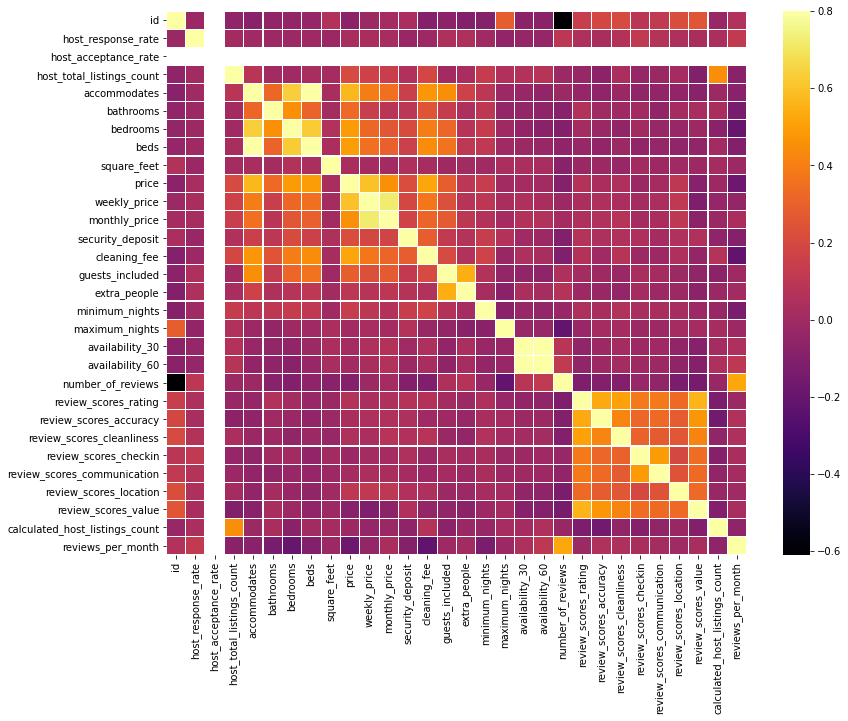

In [ ]:
#created a heatmap to understand correlation between variables
plt.figure(figsize=(13,10))
sns.heatmap(new_df.corr(),vmax=0.8,linewidth=0.1,cmap='inferno')
plt.show()


Text(0.5, 1.0, 'Listings by Neighbourhood')

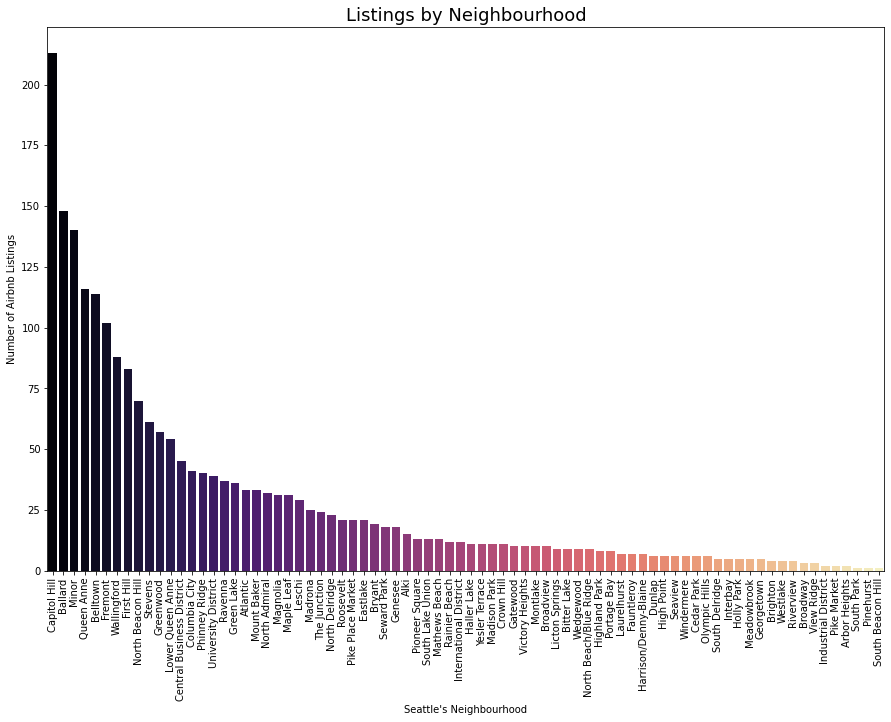

In [ ]:
#created a bar plot to visualize the amount of listings per neighbourhood
plt.figure(figsize=(15,10))
sns.countplot(x = 'neighbourhood',
              data = new_df,
              order = new_df['neighbourhood'].value_counts().index,
              palette="magma")
plt.xticks(rotation=90)
plt.xlabel("Seattle's Neighbourhood", size=10)
plt.ylabel("Number of Airbnb Listings", size=10)
plt.title("Listings by Neighbourhood", size=18)

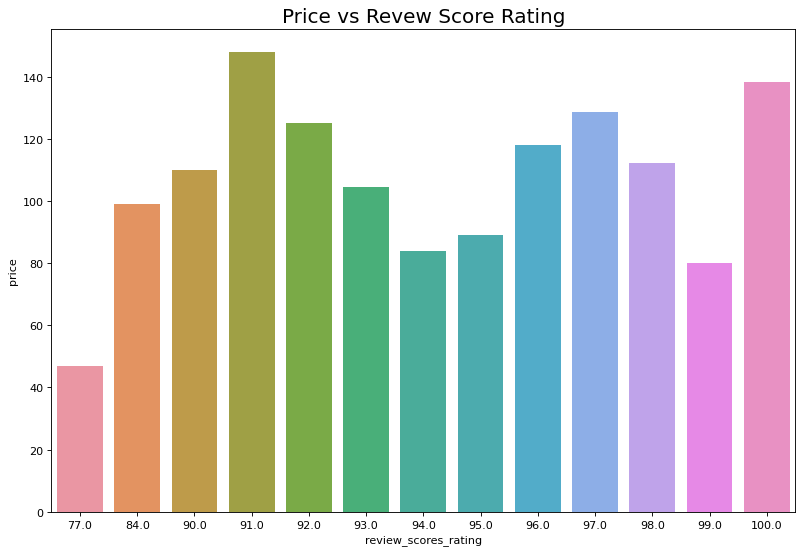

In [ ]:

# Price Vs Reviews Scores Rating bar plot

import seaborn as sns

from matplotlib.pyplot import figure

new_df_top_100 = new_df.head(n = 50)
figure(num=None, figsize=(12,8), dpi=80, facecolor='w', edgecolor='r')
sns.barplot(y="price", x = "review_scores_rating" , data = new_df_top_100, ci = None)
plt.title("Price vs Revew Score Rating", size=18)
plt.show()


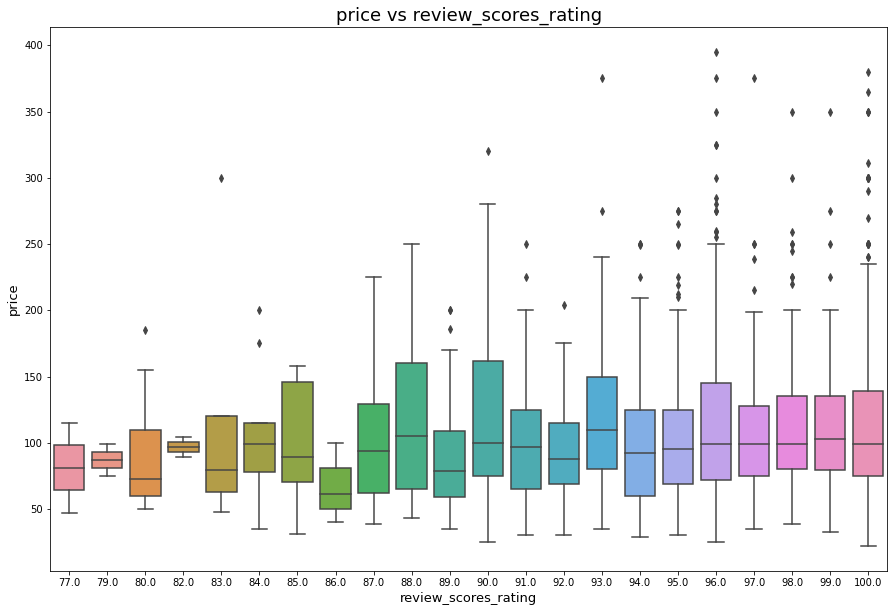

In [ ]:
#created a boxplot for Price Vs Reviews Scores Rating as well to identify outliers
plt.figure(figsize=(15,10))
sns.boxplot(x='review_scores_rating', y='price', data=new_df)
plt.title('price vs review_scores_rating', fontsize=18)
plt.xlabel('review_scores_rating', fontsize=13)
plt.ylabel('price', fontsize=13)
plt.show()

Text(0.5, 1.0, 'Price vs Bed Type')

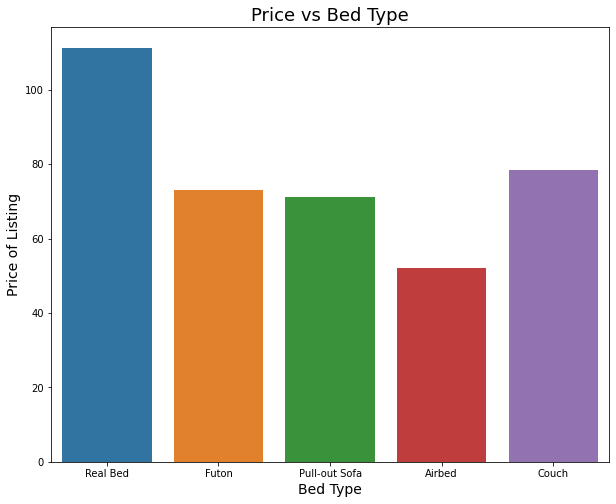

In [ ]:
#bar plot to visualize price based off of listing bed type
plt.figure(figsize=(10, 8))
sns.barplot(x="bed_type", 
            y="price", 
            data=new_df,
            ci = None)
plt.ylabel("Price of Listing", size=14)
plt.xlabel("Bed Type", size=14)
plt.title("Price vs Bed Type", size=18)


# **Step5) Exporting the clean data to a database**

In [ ]:
new_df.columns

Index(['id', 'host_since', 'host_location', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_neighbourhood', 'host_total_listings_count',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'city', 'zipcode', 'is_location_exact', 'property_type', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'bed_type',
       'square_feet', 'price', 'weekly_price', 'monthly_price',
       'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people',
       'minimum_nights', 'maximum_nights', 'availability_30',
       'availability_60', 'number_of_reviews', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'instant_bookable',
       'cancellation_policy', 'require_guest_profile_picture',
       'require_guest_phone_verification', '

In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2186 entries, 1 to 3817
Data columns (total 48 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                2186 non-null   int64  
 1   host_since                        2186 non-null   object 
 2   host_location                     2186 non-null   object 
 3   host_response_time                2186 non-null   object 
 4   host_response_rate                2186 non-null   float64
 5   host_acceptance_rate              2186 non-null   float64
 6   host_is_superhost                 2186 non-null   object 
 7   host_neighbourhood                2186 non-null   object 
 8   host_total_listings_count         2186 non-null   float64
 9   host_has_profile_pic              2186 non-null   object 
 10  host_identity_verified            2186 non-null   object 
 11  neighbourhood                     2186 non-null   object 
 12  city  

In [ ]:
import sqlite3


In [ ]:
from sqlite3 import Error

In [ ]:
conn = sqlite3.connect('Airbnb.db')


In [ ]:
c = conn.cursor()

In [ ]:
c.execute('CREATE TABLE Seattle_Listings (id integer PRIMARY KEY,host_since text NOT NULL,host_location text NOT NULL,host_response_time txt NOT NULL,host_response_rate float NOT NULL,host_acceptance_rate float NOT NULL,host_is_superhost text NOT NULL,host_neighbourhood text NOT NULL,host_total_listings_count float NOT NULL,host_has_profile_pic text NOT NULL,host_identity_verified text NOT NULL,neighbourhood text NOT NULL,city text NOT NULL,zipcode text NOT NULL,is_location_exact text NOT NULL,property_type text NOT NULL,room_type text NOT NULL,accommodates int NOT NULL,bathrooms float NOT NULL,bedrooms float NOT NULL,beds float NOT NULL,bed_type text NOT NULL,square_feet float NOT NULL,price float NOT NULL,weekly_price float NOT NULL,monthly_price float NOT NULL,security_deposit float NOT NULL,cleaning_fee float NOT NULL,guests_included int NOT NULL,extra_people float NOT NULL,minimum_nights int NOT NULL,maximum_nights int NOT NULL,availability_30 int NOT NULL,availability_60 int NOT NULL,number_of_reviews int NOT NULL,review_scores_rating float NOT NULL,review_scores_accuracy float NOT NULL,review_scores_cleanliness float NOT NULL,review_scores_checkin float NOT NULL,review_scores_communication float NOT NULL,review_scores_location float NOT NULL,review_scores_value float NOT NULL,instant_bookable text NOT NULL,cancellation_policy text NOT NULL,require_guest_profile_picture text NOT NULL,require_guest_phone_verification text NOT NULL,calculated_host_listings_count int NOT NULL,reviews_per_month float NOT NULL)')


In [ ]:

conn.commit()

In [ ]:
df.to_sql('Seattle_Listings', conn, if_exists='replace', index = False)


In [ ]:
pd.read_sql("select * from Seattle_Listings",conn)

,id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,host_total_listings_count,host_has_profile_pic,host_identity_verified,neighbourhood,city,zipcode,is_location_exact,property_type,room_type,accommodates,bathrooms,bedrooms,beds,bed_type,square_feet,price,weekly_price,monthly_price,security_deposit,cleaning_fee,guests_included,extra_people,minimum_nights,maximum_nights,availability_30,availability_60,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,2011-08-11,"Seattle, Washington, United States",within a few hours,96.0,100.0,f,Queen Anne,3.0,t,t,Queen Anne,Seattle,98119,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,750.0,85.0,650.0,2200.0,250.0,50.0,2,5.0,1,365,14,41,207,95.0,10.0,10.0,10.0,10.0,9.0,10.0,f,moderate,f,f,2,4.07
1,953595,2013-02-21,"Seattle, Washington, United States",within an hour,98.0,100.0,t,Queen Anne,6.0,t,t,Queen Anne,Seattle,98119,t,Apartment,Entire home/apt,4,1.0,1.0,1.0,Real Bed,750.0,150.0,1000.0,3000.0,100.0,40.0,1,0.0,2,90,13,13,43,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict,t,t,6,1.48
2,3308979,2014-06-12,"Seattle, Washington, United States",within a few hours,67.0,100.0,f,Queen Anne,2.0,t,t,Queen Anne,Seattle,98119,t,House,Entire home/apt,11,4.5,5.0,7.0,Real Bed,750.0,975.0,650.0,2200.0,1000.0,300.0,10,25.0,4,30,1,6,20,97.0,10.0,10.0,10.0,10.0,10.0,10.0,f,strict,f,f,2,1.15
3,7421966,2013-11-06,"Seattle, Washington, United States",None,100.0,100.0,f,Queen Anne,1.0,t,t,Queen Anne,Seattle,98119,t,Apartment,Entire home/apt,3,1.0,0.0,2.0,Real Bed,750.0,100.0,650.0,2300.0,250.0,50.0,1,0.0,1,1125,0,0,0,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,flexible,f,f,1,1.54
4,278830,2011-11-29,"Seattle, Washington, United States",within an hour,100.0,100.0,f,Queen Anne,2.0,t,t,Queen Anne,Seattle,98119,t,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,750.0,450.0,650.0,2200.0,700.0,125.0,6,15.0,1,1125,30,60,38,92.0,9.0,9.0,10.0,10.0,9.0,9.0,f,strict,f,f,1,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3813,8101950,2015-04-13,US,within a few hours,99.0,100.0,f,Holly,354.0,t,t,Fremont,Seattle,98107,t,House,Entire home/apt,6,2.0,3.0,3.0,Real Bed,750.0,359.0,650.0,2200.0,250.0,230.0,1,0.0,3,1125,18,32,1,80.0,8.0,10.0,4.0,8.0,10.0,8.0,f,strict,f,f,8,0.30
3814,8902327,2015-10-14,"Seattle, Washington, United States",within an hour,100.0,100.0,f,Portage Bay,1.0,t,t,Portage Bay,Seattle,98102,t,Apartment,Entire home/apt,4,1.0,1.0,2.0,Real Bed,750.0,79.0,650.0,2200.0,500.0,50.0,3,25.0,2,29,6,26,2,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f,moderate,f,f,1,2.00
3815,10267360,2015-12-30,US,None,100.0,100.0,f,None,1.0,t,f,None,Seattle,98178,f,House,Entire home/apt,2,1.0,1.0,1.0,Real Bed,750.0,93.0,450.0,2200.0,250.0,35.0,2,20.0,1,7,29,59,0,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,moderate,f,f,1,1.54
3816,9604740,2015-01-03,"Tacoma, Washington, United States",within an hour,100.0,100.0,f,None,1.0,t,t,None,Seattle,98112,f,Condominium,Entire home/apt,2,1.0,0.0,1.0,Real Bed,750.0,99.0,650.0,2200.0,300.0,45.0,1,0.0,3,1125,30,60,0,96.0,10.0,10.0,10.0,10.0,10.0,10.0,f,moderate,f,f,1,1.54


In [ ]:
##check to see if db file is populated
import sqlite3
import pandas as pd
conn = sqlite3.connect("Airbnb.db")
pd.read_sql("select * from Seattle_Listings",conn)